In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,SGD

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf


import cv2
import os

import numpy as np

Using TensorFlow backend.


In [2]:
labels = ['bold', 'non_bold']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
train = get_data('C:/Users/pavas.srivastava/OneDrive - Accenture/Desktop/input_images1/preprocessed_data/train')
val = get_data('C:/Users/pavas.srivastava/OneDrive - Accenture/Desktop/input_images1/preprocessed_data/val')

<AxesSubplot:ylabel='count'>

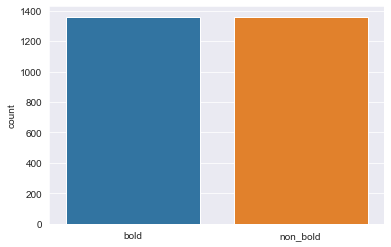

In [4]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("bold")
    else:
        l.append("non_bold")
sns.set_style('darkgrid')
sns.countplot(l)

In [5]:
x_train=[]
y_train=[]
x_val=[]
y_val=[]

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

# Normalize the data
x_train = np.array(x_train)/255
x_val = np.array(x_val)/255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [6]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [7]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())


model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(2, activation="softmax"))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 64)        18496     
______________

In [8]:
opt = Adam(lr=0.001)
model.compile(optimizer =opt , loss ='sparse_categorical_crossentropy' , metrics = ['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [9]:
history = model.fit(x_train,y_train,epochs = 10,validation_data=(x_val,y_val))


Instructions for updating:
Use tf.cast instead.
Train on 2720 samples, validate on 340 samples
Epoch 1/10
2720/2720 [==============================] - 241s - loss: 0.5527 - acc: 0.8051 - val_loss: 0.3108 - val_acc: 0.8853
Epoch 2/10
2720/2720 [==============================] - 205s - loss: 0.2124 - acc: 0.9239 - val_loss: 0.2240 - val_acc: 0.9294
Epoch 3/10
2720/2720 [==============================] - 272s - loss: 0.1436 - acc: 0.9496 - val_loss: 0.1861 - val_acc: 0.9441
Epoch 4/10
2720/2720 [==============================] - 314s - loss: 0.0918 - acc: 0.9676 - val_loss: 0.1840 - val_acc: 0.9471
Epoch 5/10
2720/2720 [==============================] - 327s - loss: 0.0667 - acc: 0.9787 - val_loss: 0.2884 - val_acc: 0.9353
Epoch 6/10
2720/2720 [==============================] - 414s - loss: 0.0441 - acc: 0.9879 - val_loss: 0.1902 - val_acc: 0.9471
Epoch 7/10
2720/2720 [==============================] - 355s - loss: 0.0306 - acc: 0.9919 - val_loss: 0.1904 - val_acc: 0.9471
Epoch 8/10
2720/

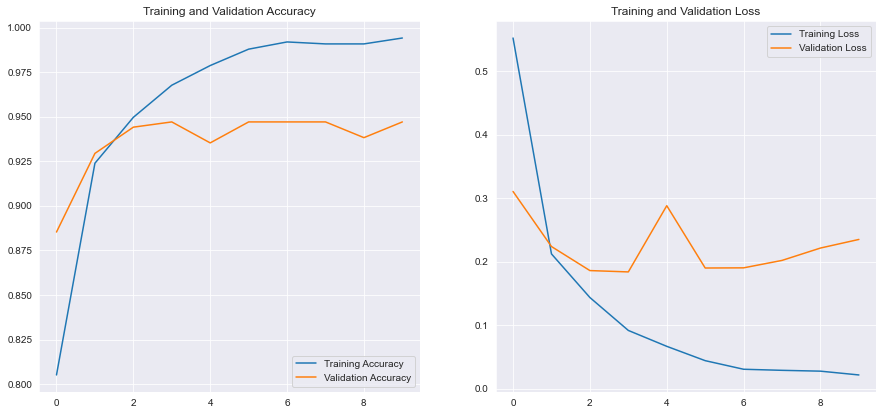

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [12]:
test = get_data('C:/Users/pavas.srivastava/OneDrive - Accenture/Desktop/input_images1/preprocessed_data/test')

In [20]:
x_test=[]
y_test=[]


for feature, label in test:
    x_test.append(feature)
    y_test.append(label)



# Normalize the data
x_test = np.array(x_test)/255


x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)



In [57]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=1)

print('\nTest Accuracy: ', test_acc)

340/340 [==============================] - 6s     

Test Accuracy:  0.9352941169458278


In [54]:

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
img_path = (r'C:/Users/pavas.srivastava/OneDrive - Accenture/Desktop/input_images/preprocessed_data/test/bold/1 (957).JPG')
img = image.load_img(img_path, target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(x.shape)

(1, 224, 224, 3)


In [55]:
preds = model.predict(x)


In [56]:
preds

array([[1., 0.]], dtype=float32)

In [58]:
model.save(r'C:/Users/pavas.srivastava/OneDrive - Accenture/Desktop/input_images1/model_93.h5')